# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs  # Datos para clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [38]:
# Datos para la clusterizacion

# center_original = 4
X,y,c = make_blobs(1200, cluster_std= 0.8, centers=6, n_features=2, return_centers=True, random_state=3)


# Datos de los clusters
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

# Centros de los clusters
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

## Visualización de datos

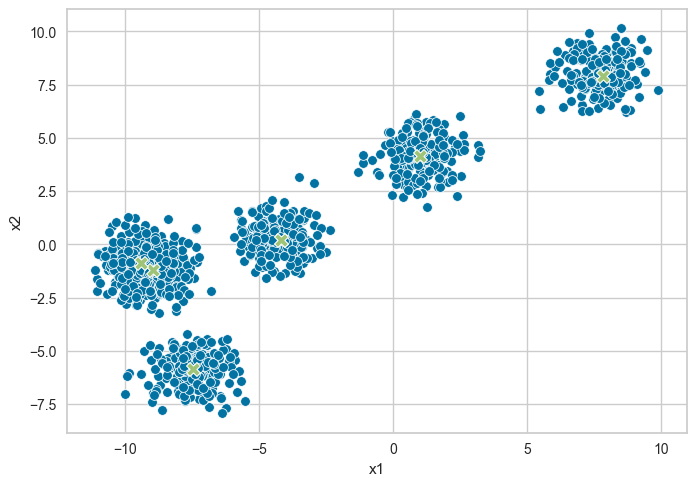

In [39]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

## Aplicando K-means

In [4]:
# Instanciamos el modelo no 'n' clusters
kmeans = KMeans(n_clusters = 4)

# Entrenamos el modelo y predecimos
df_cluster = kmeans.fit_predict(X)

# Guardamos las predicciones
df_blobs['cluster'] = df_cluster

# Obtenemos los centroides calculados por el modelo
k_means_centers = kmeans.cluster_centers_

# Guardamos los centroides en un df
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
     
    }
)


c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


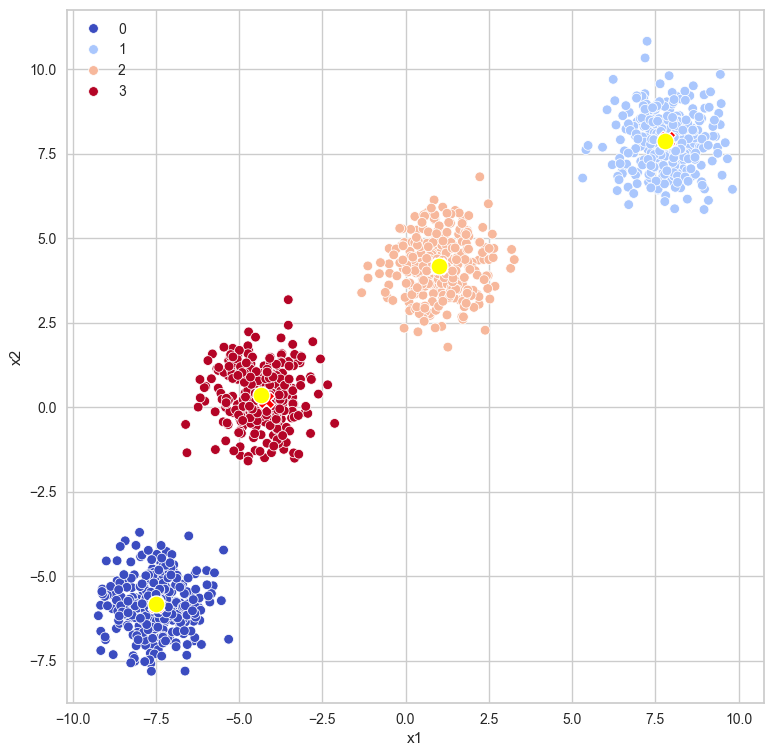

In [5]:
fig = plt.figure(figsize=(9,9))

# Graficamos los puntos, agregando su distincion con los clusters predichos
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')

# Graficamos los centros dados al principio
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')

# Graficamos los centroides obtenidos
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()


In [6]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

In [7]:
# for _ in range(3,7):
#     print(_)
#     vis_cluster(_)

## Encontrando el valor de K

In [40]:
import numpy as np
import pwlf
import matplotlib.pyplot as plt

def elbow_point(K:list, innert_points: list):
    # Ejemplo de datos (puedes reemplazarlos con tus datos)
    x = np.array(K)
    y = np.array(innert_points)

    # Crear el modelo de regresión por tramos
    model = pwlf.PiecewiseLinFit(x, y)

    # Ajustar con dos segmentos (un segmento antes y después del cambio)
    breakpoints = model.fit(2)

    # Obtener el breakpoint redondeado al número entero más cercano
    breakpoint_rounded = int(round(breakpoints[1]))
    # --------------------------------------------


    print("Punto de cambio (entero):", breakpoint_rounded)

    print(breakpoints[1])
    plt.plot(x, y, 'o', label='Datos originales')
    plt.plot(x, y, '-', label='Ajuste por tramos')
    plt.axvline(x=breakpoint_rounded, color='r', linestyle='--', label='Punto de cambio (entero)')
    plt.legend()
    plt.show()



Punto de cambio (entero): 5
4.743355807315043


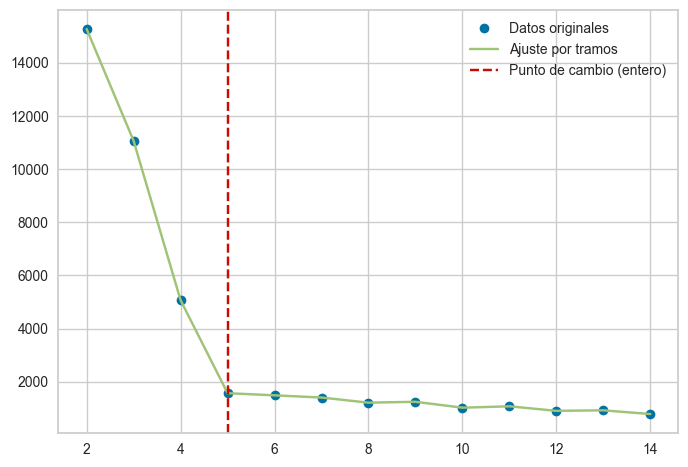

In [41]:
sum_of_squared_distances = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

elbow_point(K, sum_of_squared_distances)

In [60]:
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

km = KMeans(n_init='auto')

def silhouette_graff(K_model: KMeans, X):
    silhouette_scores = []
    K = range(2, 15)
    
    # Iterar sobre el rango de valores de k
    for k in K:
        # Actualizar el número de clústeres del modelo existente
        K_model.set_params(n_clusters=k)
        
        # Entrenar el modelo con los nuevos clústeres
        K_model.fit(X)
        
        # Predecir las etiquetas de los clústeres
        y = K_model.predict(X)
        
        # Calcular el coeficiente de silueta
        silhouette_scores.append(silhouette_score(X, y))

    # Crear el gráfico con Seaborn
    plt.figure(figsize=(8, 8))  # Tamaño de la figura
    sns.lineplot(x=K, y=silhouette_scores, marker='x', color='blue')

    # Etiquetas de los ejes
    plt.xlabel('k', fontsize=14)
    plt.ylabel('Silhouette Score', fontsize=14)

    # Mostrar el gráfico
    plt.show()


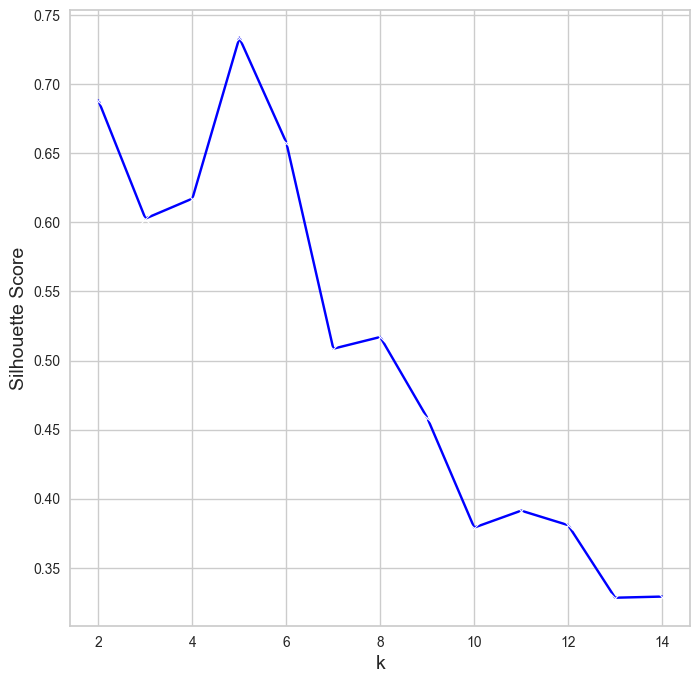

In [61]:
silhouette_graff(km, X)

## Evaluando clusters con K-means

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


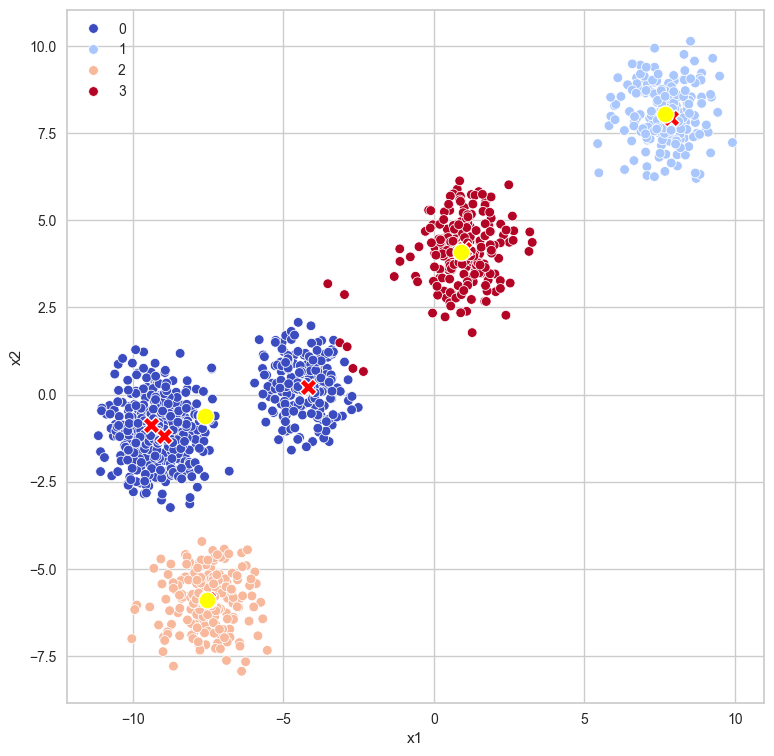

In [62]:
vis_cluster(4)

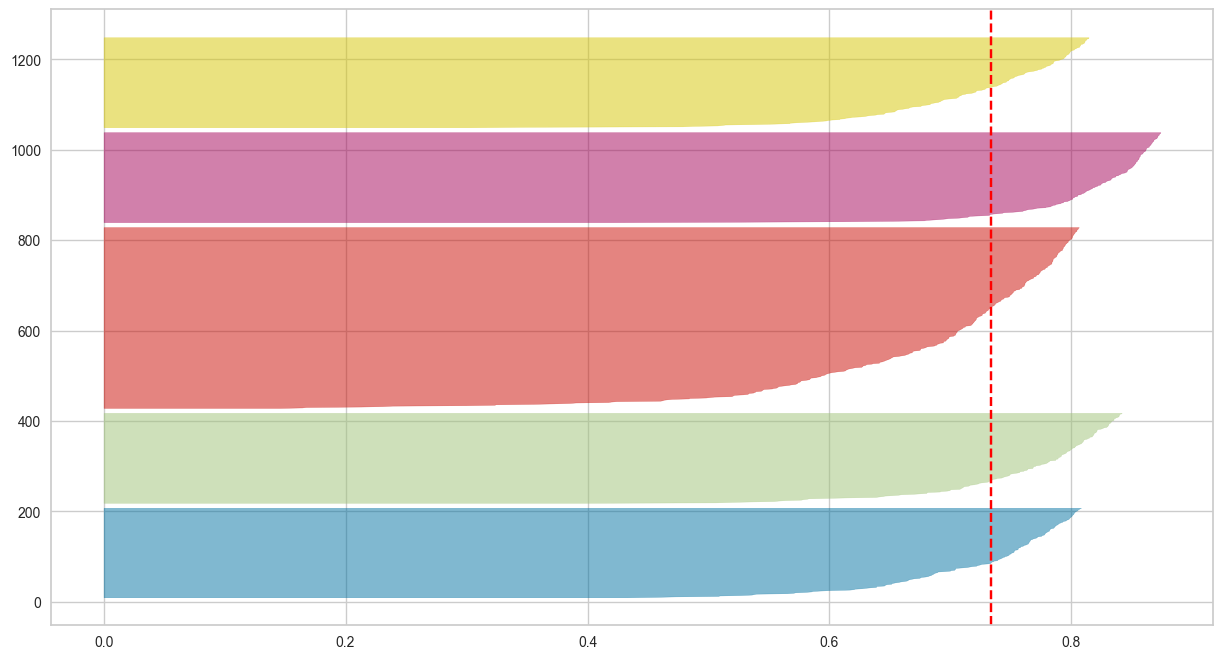

In [70]:
from yellowbrick.cluster import SilhouetteVisualizer
Kmodel = KMeans(n_clusters=5, n_init='auto') 
def SilhouetteVisualizer_Model(K_model: KMeans):
    plt.figure(figsize=(15,8))
    km = K_model
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X)
    plt.show()

SilhouetteVisualizer_Model(Kmodel)